## PARTE A ## 
Transformación de Datos
Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:


RESPUESTA: en este caso se implementaron 3 trasnformaciones:  encoding, datos faltantes y escalado

En el desarrollo del proyecto se eligió trabajar con valores faltantes, ya que comprender las razones por las que hay datos faltantes es fundamental para hacer un correcto manejo de los datos que sí tenemos. Para esto se utilizará el modelo de imputación de datos faltantes, que consiste en rellenar los valores faltantes con estadísticos obtenidos de los datos que sí tenemos. 

También vamos a utilizar en la transformación de los datos el escalado, ya que en lo datasets solemos tener distintas variables, medidas en diferentes unidades y con distintas escalas. Por ejemplo,en nuestro dataset, vamos a encontrar diferentes datos como lo son precios, áreas, unidades como lo son número de baños o habitaciones, entre otros. Y a pesar de que estas unidades facilitan el entendimiento humano, el modelo de machine learning puede llegar a  confundirse. 

Finalmente vamos a utlizar el modelo de trabsformación de datos de variable categorica, especificamente una técnica llamada Label Encoding. Es importante reconocer con qué tipo de variable estamos trabajando ya que esto nos ayudará a operar correctamente con ella. En el caso de las variables categóricas ordinales, tiene sentido una asignación del tipo que hicimos para las propiedades, teniendo cuidado de mantener una distancia “realista” entre cada etiqueta y no asumir que, porque ahora se trata de números, hay que sumarlos entre sí.

In [1]:
# importar dependencias
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
#Se carga el dataset original
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv", parse_dates = ["created_on"])

In [3]:
#Se realiza nuevamente el filtrado del dataset según las características indicadas (Capital federal: Departamento, PH, Casa)
df_filtered1= df[(df.property_type.isin(["Departamento", "PH", "Casa"]))& (df.l2.isin(["Capital Federal"]))]

In [4]:
#Superficie total menor a 1000 m2 y mayor a 15 m2
df_filtered2= df_filtered1[df_filtered1["surface_total"] < 1000]
df_filtered3= df_filtered2[df_filtered2["surface_total"] > 15]

In [5]:
#precio menor a 4000000 dólares
df_filtered4= df_filtered3[df_filtered3["price"] < 4000000]

IMPUTACION DE DATOS FALTANTES: Se aplicara un metodo de interpolacion lineal 

In [6]:
df_interpolado = df_filtered4.interpolate(method='linear', axis=0).bfill()

ENCODING: se aplicara un proceso de encoding para la variable l3 (tipo de Barrio) 
Para codificar valores categóricos es utilizar una técnica llamada codificación de etiquetas.
Consiste simplemente  en convertir cada valor de una columna en un número.
Si mandamos a imprimir los tipos de datos vemos que el atributo l3 es un objeto

In [7]:

print(df_interpolado.dtypes)

start_date                 object
end_date                   object
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dtype: object


In [8]:
#Luego convertimos esa columna en una variable categorica
df_interpolado["l3"] = df_interpolado["l3"].astype('category')
print(df_interpolado.dtypes)
#Luego aplicamos el metodo de encoding label
df_interpolado["l3"] = df_interpolado["l3"].cat.codes

start_date                 object
end_date                   object
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                       category
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dtype: object


In [9]:
#seleccionar las columnas l3, rooms, bedrooms, barhrooms, surface_total, surface_covered y price
df_datos_final = df_interpolado.drop(columns=['start_date','end_date','created_on','lat','lon','l1','l2','currency','title','description','property_type','operation_type'])

ESCALADO: Escalado de datos usando la tecnica de NORMALIZACION MEDIA
La normalización media es una de las formas más fáciles de normalizar los Dataframes de rangos variados.
se hace restando la media y dividiendo por la desviación estándar para todos los elementos del Dataframe.
Para eso se crea una pequeña funcion que nos hace esa tarea

In [10]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [11]:
# Ahora se usa la funcion creada
df_norm = mean_norm(df_datos_final)
df_final=df_norm
print(df_norm.head())

         l3     rooms  bedrooms  bathrooms  surface_total  surface_covered  \
0  0.890826  3.054018  4.758268   0.526798       0.582808         0.356385   
1 -0.977123 -0.769715 -0.951820   0.526798      -0.327062        -0.172718   
2  0.143646 -0.769715 -0.951820  -0.649855      -0.652015        -0.256600   
3  0.143646 -0.769715 -0.951820  -0.649855      -0.132090        -0.224337   
5  1.264416 -0.769715 -0.951820  -0.649855      -0.509036        -0.185623   

      price  
0 -0.371713  
1 -0.351298  
2 -0.466982  
3  0.111438  
5 -0.381920  


In [12]:
df_final.corr()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
l3,1.000000,-0.033534,-0.047005,-0.040270,0.013130,0.000616,0.013876
rooms,-0.033534,1.000000,0.925983,0.602693,0.725676,0.305091,0.483126
bedrooms,-0.047005,0.925983,1.000000,0.605627,0.695591,0.291844,0.445283
bathrooms,-0.040270,0.602693,0.605627,1.000000,0.650115,0.275286,0.637212
surface_total,0.013130,0.725676,0.695591,0.650115,1.000000,0.376260,0.687085
surface_covered,0.000616,0.305091,0.291844,0.275286,0.376260,1.000000,0.298575
price,0.013876,0.483126,0.445283,0.637212,0.687085,0.298575,1.000000


In [13]:
display(df_final)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0.890826,3.054018,4.758268,0.526798,0.582808,0.356385,-0.371713
1,-0.977123,-0.769715,-0.951820,0.526798,-0.327062,-0.172718,-0.351298
2,0.143646,-0.769715,-0.951820,-0.649855,-0.652015,-0.256600,-0.466982
3,0.143646,-0.769715,-0.951820,-0.649855,-0.132090,-0.224337,0.111438
5,1.264416,-0.769715,-0.951820,-0.649855,-0.509036,-0.185623,-0.381920
...,...,...,...,...,...,...,...
146554,0.143646,0.759778,0.951543,1.703452,1.037743,0.169263,1.047116
146555,0.143646,-0.004968,-0.000139,0.526798,0.634801,0.317670,0.740894
146556,0.143646,0.759778,-0.000139,0.526798,2.883480,0.375743,0.911017
146557,0.143646,-0.004968,-0.000139,0.526798,0.647799,0.388648,0.536746


Las mejores variables para predecir el precio de una propiedad es el barrio, el numero de rooms, bedrooms y bathrooms

Se Vuelve a entrenar el modelo implementado en la Parte 1 - en particular, el árbol de decisión - con este nuevo dataset

In [14]:
# Para empezar vamos a separar el dataset en un conjunto de entrenamiento (80%) y un conjunto de test (20%).
# Se separa el dataset en X_train, X_test, y_train e y_test con el tamaño correspondiente
X = df_final.drop(['price'], axis=1) #esto quita a la columna target
y = df_datos_final['price']                #esta es la columna target

In [15]:
#importar módulo Skl
from sklearn.model_selection import train_test_split

In [16]:
# Se realiza la separación a continuación en esta celda
#separa conjuntos
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2)

In [17]:
print("Train test size: ", X_train.shape)
print("Test train size: ", X_test.shape)

Train test size:  (65877, 6)
Test train size:  (16470, 6)


Se Aplica el Algoritmo de **Árboles de decisión**

 Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al RMSE.
 Para poder obtener el RMSE vamos a medir el mean_squared_error y obtener su raíz cuadrada.

In [18]:
# En esta celda se carga el regresor y se realiza el entrenamiento
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree_reg = DecisionTreeRegressor() #asigna el DTRegressor a tree_reg. Es regresor porque es una variable continua (precios).
tree_reg.fit(X_train, y_train)     #entrena en los dos conjuntos

DecisionTreeRegressor()

Con el modelo entrenado se realiza la predicción sobre el conjunto de test X_test y se guarda el resultado en una variable y_pred

In [20]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)

Calculá el rmse sacando la raíz cuadrada de mean_squared_error entre y_test e y_pred y mostrá el resultado

In [21]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np
tree_mse = mean_squared_error(y_test, y_pred) #error cuadrático medio
tree_rmse = np.sqrt(tree_mse)                #para sacar la raíz cuadrada
print("RSME: ", tree_rmse)

RSME:  107467.75651654141


Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.

Para esto, se itera de 5 en 5 en el parámetro max_depth y observá como impacta en el RMSE.
Creá dos arreglos rmses_train y rmses_test para ir guardando los rmse de cada profundidad
Ahora graficamos los valores que guardamos en los arreglos rmses_train y rmses_test

In [22]:
rmses_train = []
rmses_test= []

profundidad = [5, 10, 15, 20, 25, 30]
for value in profundidad:
    #asigna las profundidades del árbol mediante el loop
    deep_reg_tree = DecisionTreeRegressor(max_depth=value)

    #entrena el modelo
    deep_reg_tree.fit(X_train, y_train)

    #predice sobre X_test, sacando el MSE y RMSE sobre y_test e y_pred_test
    y_pred_test = deep_reg_tree.predict(X_test)
    tree_mse_test = mean_squared_error(y_test, y_pred_test)
    tree_rmse_test = np.sqrt(tree_mse_test)

    #predice sobre X_train, sacando el MSE y RMSE sobre y_test e y_pred_test
    y_pred_train = deep_reg_tree.predict(X_train)
    tree_mse_train = mean_squared_error(y_train, y_pred_train)
    tree_rmse_train = np.sqrt(tree_mse_train)

    rmses_train.append(tree_rmse_train) #agrega la información a las listas de arriba
    rmses_test.append(tree_rmse_test) #agrega la información a las listas de arriba

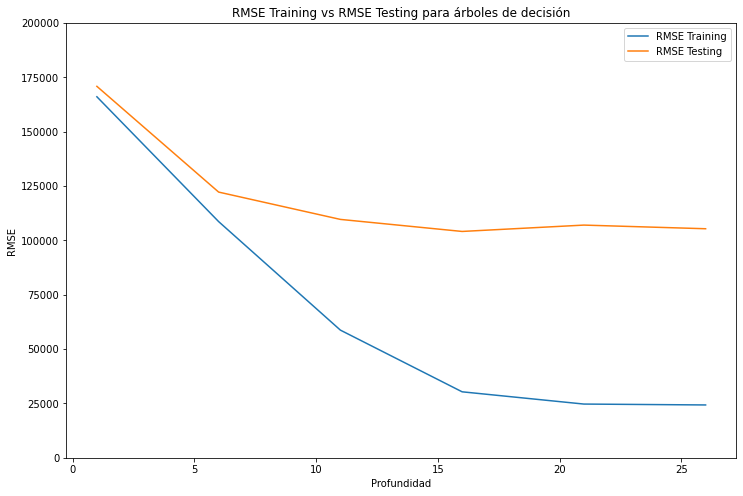

In [23]:
# Ahora se grafican los errores y se obtiene el valor optimo de la profunidad del arbol
import matplotlib.pyplot as plt
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 200000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.xlabel("Profundidad") 
plt.ylabel("RMSE") 
plt.show()

CONCLUSION :
Se obtuvo un menor valor del parametro RMSE comparado con la parte 1,
esto se debe al preprocesamiento que se hizo de los datos, incluyo el parametro "tipo de barrio"
el cual se tuvo que transformar de categorico a numerico, se paso de 5 atributos a 6 atributos.
Ademas se nota el efecto positivo de la normalizacion de los datos.
El valor optimo de la profundidad del arbol esta entre 15 y 20 para un error levemento superior a 25000

## PARTE B - Modelos Avanzados## 

In [1]:
import warnings
warnings.filterwarnings("ignore")

# importar dependencias
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Se carga el dataset original
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv", parse_dates = ["created_on"])

In [3]:
#Se realiza nuevamente el filtrado del dataset según las características indicadas (Capital federal: Departamento, PH, Casa)
df_filtered1= df[(df.property_type.isin(["Departamento", "PH", "Casa"]))& (df.l2.isin(["Capital Federal"]))]

In [4]:
#Superficie total menor a 1000 m2 y mayor a 15 m2
df_filtered2= df_filtered1[df_filtered1["surface_total"] < 1000]
df_filtered3= df_filtered2[df_filtered2["surface_total"] > 15]

In [5]:
#precio menor a 4000000 dólares
df_filtered4= df_filtered3[df_filtered3["price"] < 4000000]

In [6]:
#seleccionar las columnas rooms, bedrooms, barhrooms, surface_total, surface_covered y price
df_final = df_filtered4.drop(columns=['start_date','end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','property_type','operation_type'])

In [7]:
df_final.dropna(subset=['surface_covered', "bathrooms"], inplace = True)

In [8]:
# Para empezar vamos a separar el dataset en un conjunto de entrenamiento (80%) y un conjunto de test (20%).
# Se separa el dataset en X_train, X_test, y_train e y_test con el tamaño correspondiente
X = df_final.drop(['price'], axis=1) #esto quita a la columna target
y = df_final['price']                #esta es la columna target

In [9]:
#importar módulo Skl
from sklearn.model_selection import train_test_split

In [10]:
# Se realiza la separación a continuación en esta celda
#separa conjuntos
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2)

print("Train test size: ", X_train.shape)
print("Test train size: ", X_test.shape)

Train test size:  (64794, 5)
Test train size:  (16199, 5)


**6.	Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en la parte 01**
Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

RESPUESTA: Se eligieron los modelos SVM y Random forest

In [12]:
#Lista para guardar el score de cada modelo
SCORE_modelo=[]

In [13]:
# Entrenando el Random Forest 
# Importando el modelo Random forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor() # Instanciar el modelo de estimacion
random_forest_model.fit(X_train , y_train) # Entrenando

RandomForestRegressor()

In [14]:
#Validacion cruzada
from sklearn.model_selection import cross_val_score

#  Para validar Se toma como entrada el número de diferentes divisiones (pliegues) que se utilizarán (5 en el ejemplo a continuación).
scores_random_forest = cross_val_score(random_forest_model, X, y, cv=5)
print(' ')
print(' Los resultados de la validacion cruzada para Random Forest es: ')
print(scores_random_forest)
print ("Accuracy_ Random Forest: %0.2f (+/- %0.2f)" % (scores_random_forest.mean(), scores_random_forest.std() / 2))
SCORE_modelo.append(scores_random_forest.mean()) # Se agrega a la lista el desempeño

 
 Los resultados de la validacion cruzada para Random Forest es: 
[0.71701144 0.8565118  0.80166625 0.83232378 0.8693618 ]
Accuracy_ Random Forest: 0.82 (+/- 0.03)


In [15]:
# Entrenando el AdaboosRegressor 
# Importando el modelo AdaboosRegressor
from sklearn.ensemble import AdaBoostRegressor
AdaBoost_model = AdaBoostRegressor()
AdaBoost_model.fit(X_train,y_train)
scores_AdaBoost = cross_val_score(AdaBoost_model, X, y, cv=5)
print(' ')
print(' Los resultados de la validacion cruzada para AdaBoost: ')
print(scores_AdaBoost)
print ("Accuracy_ AdaBoost: %0.2f (+/- %0.2f)" % (scores_AdaBoost.mean(), scores_AdaBoost.std() / 2))
SCORE_modelo.append(scores_AdaBoost.mean()) # Se agrega a la lista el desempeño

 
 Los resultados de la validacion cruzada para AdaBoost: 
[0.46034138 0.55098589 0.33778895 0.37729998 0.62954688]
Accuracy_ AdaBoost: 0.47 (+/- 0.05)


In [16]:
# Entrenando nuevamente el ARBOL DE DESICION DE la parte 1 SOLO PARA comparar 
# Importando el modelo
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor() #asigna el DTRegressor a tree_reg. Es regresor porque es una variable continua (precios).
tree_reg.fit(X_train, y_train)     #entrena en los dos conjuntos

#  Para validar Se toma como entrada el número de diferentes divisiones (pliegues) que se utilizarán (5 en el ejemplo a continuación).
scores_arbol = cross_val_score(tree_reg, X, y, cv=5)
print(' ')
print(' Los resultados de la validacion cruzada para Arbol de decision: ')
print(scores_arbol)
print ("Accuracy_ arbol: %0.2f (+/- %0.2f)" % (scores_arbol.mean(), scores_arbol.std() / 2))
SCORE_modelo.append(scores_arbol.mean())

 
 Los resultados de la validacion cruzada para Arbol de decision: 
[0.62409023 0.79328261 0.73919172 0.76855837 0.80467849]
Accuracy_ arbol: 0.75 (+/- 0.03)


**Conclusion:** El modelo avanzado Random Forest genero mejores resultados (Accuracy= 0.80 (+/- 0.03) que
el modelo de la PARTE 1 (Accuracy: 0.75 (+/- 0.03), sin embargo para el modelo AdaBoost usando los
parametros por defecto, la confiablidad del modelo fue inferior , presentando un valor de 0.43 (+/- 0.07)

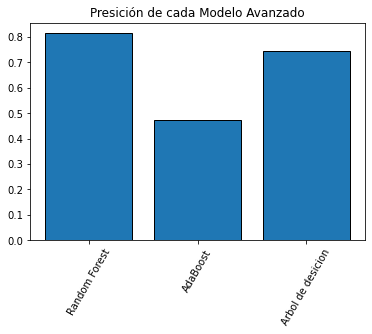

In [17]:
# Graficar los rendimientos de cada modelo
plt.bar(range(3),SCORE_modelo, edgecolor='black')
plt.xticks(range(3), ['Random Forest', 'AdaBoost', 'Arbol de desicion'], rotation=60)
plt.title("Presición de cada Modelo Avanzado")
plt.show()

**7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search**

Optimizacion usando Grid Search

In [18]:
# importar la funcion uniform para generar valores aleatorios
from scipy.stats import uniform, randint
#importar el modulo de busqueda aleatoria
from sklearn.model_selection import GridSearchCV

Random Forest :Hyperparameter Randomsearching

In [19]:
# n_estimators: es el numero de arboles, mientras mas grande mayor poder de prediccion.
# random_state: controla la aletaoriedad cuando se busca la mejor división en cada nodo
# max_depth:  La profundidad máxima del árbol
params = [{'n_estimators': [20,40,60],'random_state': [1,3,5],'max_depth': [1,3,5] }]

In [20]:
#PAra hacer la validacion cruzada se usa el parametro "Scoring",
search_random_forest = GridSearchCV(
        random_forest_model, params, scoring= 'r2')
search_random_forest.fit(X_train, y_train)
print("Mejores parametros:")
print(search_random_forest.best_params_)
scores_search_random_forest = cross_val_score(search_random_forest, X, y, cv=5)
print(' ')
print(' Los resultados de optimizacion de Random Forest: ')
print(scores_search_random_forest)
print ("Accuracy_ Random Forest: %0.2f (+/- %0.2f)" % (scores_search_random_forest.mean(), scores_search_random_forest.std() / 2))
print('Accuracy_ RandomForest Optimizado (conj. entrenamiento):', round(search_random_forest.best_score_,2))

Mejores parametros:
{'max_depth': 5, 'n_estimators': 60, 'random_state': 1}
 
 Los resultados de optimizacion de Random Forest: 
[0.6313479  0.69567643 0.65691712 0.68258181 0.71592674]
Accuracy_ Random Forest: 0.68 (+/- 0.01)
Accuracy_ RandomForest Optimizado (conj. entrenamiento): 0.69


AdaboosRegressor ::Hyperparameter Randomsearching

In [21]:
# Definicion del juego de parametros a probar
print('Optimizacion para AdaboostRegressor....')
# configurar el conjunto de parametros por validacion cruzada
# Se realizó ejecuciones previas para seleccionar el rango de los parametros
# en el caso de la funcion de predidas solo se consideraron linear y exponencial
# porque los resultados con  ‘square’, los resultados fueron peores.
# En el caso del parametro learning rate (tasa de aprendizaje( reduce la contribución de cada regresor
# en el proceso de autoaprendizaje, en teoria mientras mas pequeño mejor.

params = [{'n_estimators': [10,30,50],'random_state': [1,3,5],'learning_rate': [0.5,1,1.5],
            'loss':['linear', 'exponential'] }]

#Para hacer la validacion cruzada se usa el parametro "Scoring",
search_Ada = GridSearchCV(AdaBoost_model, params, scoring= 'r2')
search_Ada.fit(X_train, y_train)
print("Mejores parametros:")
print(search_Ada.best_params_)
scores_search_Ada = cross_val_score(search_Ada, X, y, cv=5)
print(' ')
print(' Los resultados de optimizacion de AdaBoostRegressor: ')
print(scores_search_Ada)
print ("Accuracy_ AdaBoost: %0.2f (+/- %0.2f)" % (scores_search_Ada.mean(), scores_search_Ada.std() / 2))
print('Accuracy_ AdaBoost Optimizado(conj. entrenamiento):', round(search_Ada.best_score_,2))

Optimizacion para AdaboostRegressor....
Mejores parametros:
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 1}
 
 Los resultados de optimizacion de AdaBoostRegressor: 
[0.53879978 0.60036008 0.55805454 0.58528334 0.67225602]
Accuracy_ AdaBoost: 0.59 (+/- 0.02)
Accuracy_ AdaBoost Optimizado(conj. entrenamiento): 0.61


**8.Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.**

En este caso particular se selecciona el modelo de Randon Forest por su mejor desempeño
en la validacion cruzada. Sin embargo, el modelo de la PARTE A seria el mejor ya que
fue creado usando las tecnicas de pre procesamiento o transformacion de datos, lo cual
incrementa el poder de prediccion respecto a usar los datos crudos.

## PARTE C - Interpretación de modelos

9.	¿Qué variables fueron relevantes para el modelo para hacer una predicción?
¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas.
Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles
al azar y observa qué atributos considera importantes.

¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde,
¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Respuesta:

Luego de contruir las graficas de correlacion (se encuentran en la parte A) conjunto y estimar los coeficientes de correlacion se puede concluir que:

* Las variables que fueron relevantes fueron: rooms ,bedrooms,bathrooms

* Las variables que tienen poca importancia son: surface_total y surface_covered

* Las variables que no tienen importancia son :start_date ,end_date, created_on asi como: currency, title, 	description ,	operation_type, adicionalmente la variable "l1" que es el tipo de pais no tiene ningun tipo de influencia en el precio.

* Los métodos de selección de variables relevantes, brindan información útil sobre la importancia relativa o la relevancia de las características para un problema determinado. Puede utilizar esta información para crear versiones filtradas de su conjunto de datos y aumentar la precisión de sus modelos.
 
* Utilizamos el modelo de validacion cruzada que es una técnica que se usa a menudo en el aprendizaje automático para evaluar la variabilidad de un conjunto de datos y la confiabilidad de cualquier modelo entrenado con ellos. Uno de los parámetros importantes para la utilización de este modelo son los pliegues o divisiones que utilizaremos, por ejemplo, si crea cinco pliegues como lo hicimos en nuestro caso, el módulo genera cinco modelos durante la validación cruzada. El módulo entrena cada modelo con cuatro quintos de los datos. Prueba cada modelo en el quinto restante.

* Una ventaja de utilizar la validación cruzada es que utiliza todo el conjunto de datos de entrenamiento para el entrenamiento y la evaluación, en lugar de una parte, al mismo tiempo esto nos trae una desventaja ya que es mucho más intensivo a nivel computacional y tarda mucho más tiempo que la validación con una división aleatoria.

* Una de las principales ventajas del método de árboles de decisión es su interpretabilidad, pues nos da un conjunto de reglas a partir de las cuales se pueden tomar decisiones. Este es un algoritmo que no es demandante en poder de cómputo comparado con procedimientos más sofisticados y, a pesar de ello, que tiende a dar buenos resultados de predicción para muchos tipos de datos.



10.	¿Cómo es la distribución de errores (regresión) ?

Respuesta:

* El menor error se obtuvo cuando se aplicaron las técnicas de transformacion de datos al dataset (para el caso del modelo árbol de decisión), en este caso pudimos observar con las gráficas que con una profundidad entre 10 y 15 es donde podemos obtener los mejores resultados para este modelo. 

* Los modelos avanzados son mas potentes pero requieren mas tiempo de cálculo sobre el algortimo de random forest, que fue el de mejor desempeño, sin embargo para este modelo no se tomó las técnicas de transformación como se realizó en la parte A del trabajo, es por esto que nuestro modelo de random forest se convierte en un modelo un poco menos confiable que el de árboles de decisión mencionado anteriormente. 

* A partir de los resultados obtenidos, se puede inferir que los menores errores se pueden obtener si se usa el dataset de datos transformados en la PARTE A, pero aplicando alguno de los modelos avanzados, ya que al incluir un atributo mas se incrementa la cantidad de informacion disponible para que el algoritmo aprenda.

* El modelo avanzado Random Forest genero mejores resultados (Accuracy= 0.80 (+/- 0.03) que el modelo de la PARTE 1 (Accuracy: 0.75 (+/- 0.03), sin embargo para el modelo AdaBoost usando los parametros por defecto, la confiablidad del modelo fue inferior , presentando un valor de 0.43 (+/- 0.07).

* Según lo investigado con el modelo AdaBoost es fácil producir con este tipo de modelos overfitting, es decir el modelo puede quedar sobreentrenado y esto puede llevarnos a generar un error mayor, como sucedió en nuestro caso. 


## DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [22]:
# importar dependencias
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
#Se carga el dataset original
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv", parse_dates = ["created_on"])

In [25]:
#DEbido a la gran cantidad de datos se filtra la data considerando solo La ZOna Norte
nombre_de_la_zona="Bs.As. G.B.A. Zona Norte"

In [26]:
df_filtered1= df[(df.property_type.isin(["Departamento", "PH", "Casa"]))& (df.l2.isin([nombre_de_la_zona]))]

In [27]:
#Superficie total menor a 1000 m2 y mayor a 15 m2
df_filtered2= df_filtered1[df_filtered1["surface_total"] < 1000]
df_filtered3= df_filtered2[df_filtered2["surface_total"] > 15]

In [28]:
#precio menor a 4000000 dólares
df_filtered4= df_filtered3[df_filtered3["price"] < 4000000]

In [30]:
#IMPUTACION DE DATOS FALTANTES: Se aplicara un metodo de interpolacion lineal
df_interpolado = df_filtered4.interpolate(method='linear', axis=0).bfill()

ENCODING: se aplicara un proceso de encoding para la variable l3 (tipo de Barrio) 
Para codificar valores categóricos es utilizar una técnica llamada codificación de etiquetas.
Consiste simplemente  en convertir cada valor de una columna en un número.
Si mandamos a imprimir los tipos de datos vemos que el atributo l3 es un objet

In [31]:
#Luego convertimos esa columna en una variable categorica
df_interpolado["l3"] = df_interpolado["l3"].astype('category')

In [32]:
#Luego aplicamos el metodo de encoding label
df_interpolado["l3"] = df_interpolado["l3"].cat.codes

In [33]:
#seleccionar las columnas l3, rooms, bedrooms, barhrooms, surface_total, surface_covered y price
df_datos_final = df_interpolado.drop(columns=['start_date','end_date','created_on','lat','lon','l1','l2','l3',
                                    'currency','title','description','property_type','operation_type'
                                     ])

ESCALADO: Escalado de datos usando la tecnica de NORMALIZACION MEDIA
La normalización media es una de las formas más fáciles de normalizar los Dataframes de rangos variados.
se hace restando la media y dividiendo por la desviación estándar para todos los elementos del Dataframe.
Para eso se crea una pequeña funcion que nos hace esa tarea

In [34]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [35]:
# Ahora se usa la funcion creada
df_norm = mean_norm(df_datos_final)
df_final=df_norm

In [36]:
#SE importan  las librerias para aplicar analisis de Componentes Principales
from sklearn.decomposition import PCA
from numpy import unique

In [37]:
#Aqui se aplica un algortimo para reducir dimensionalidad a solo 2 dimensiones
pca =PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(df_final))

In [38]:
#Se aplica un algoritmo de Clasificacion No supervisada para hacer el cluster
from sklearn.cluster import AgglomerativeClustering
# define el model
num_cluster=4 # numero de cluster
model = AgglomerativeClustering(n_clusters=num_cluster)
# ajustar el modelo
reduced1=np.asarray(reduced)
yhat = model.fit_predict(reduced1)
# retrieve unique clusters
clusters = unique(yhat)

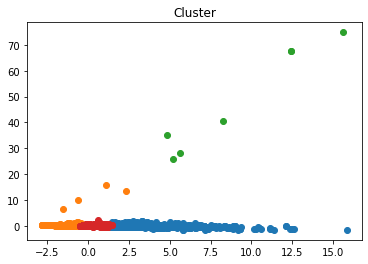

In [39]:
#Se importan las librerias para graficar una grafico de dispersion
from numpy import where
from matplotlib import pyplot

# graficar un scatter plot for samples por cada cluster
for cluster in clusters:
	# se obtienen el indice para cada cluster
	row_ix = where(yhat == cluster)
	# create scatter
	pyplot.scatter(reduced1[row_ix, 0], reduced1[row_ix, 1])
pyplot.title('Cluster')
# mostrar la grafica
pyplot.show()

In [40]:
# para Agregar la columna de cluster como nueva y poder comparar con el cluster
df_filtered4['Cluster']=pd.DataFrame(yhat) # se agrega la columna cluster con el numero de cluster

In [41]:
#para saber que BArrios pertencen a que cluster
print('Los Barrios que mas se parecen entre si son: ')

Los Barrios que mas se parecen entre si son: 


In [42]:
import operator
#Para filtrar los barrios del cluster 1
print('---------------------')
print(' ')
for n in range(num_cluster):
    df_cluster= df_filtered4[df_filtered4["Cluster"] ==n]
    #print(df_cluster.shape)
    Barrios=list(df_cluster['l3'])
    cluster = []
    for i in Barrios:
        if i not in cluster:
            cluster.append(i)
    #Crear un diccionario con los barrios y sus frecuencias
    dic_barrios={}
    for clase in cluster:
        porcentaje_barrio=Barrios.count(clase)/len(Barrios)*100 #calcula la proporcion de cada clase
        if porcentaje_barrio>15: #filtrando frecuencias menores al 15%
            dic_barrios.setdefault(clase , round(porcentaje_barrio,2))
    #ordenar le diccionario por su valor
    print('Barios del cluster #: ',str(n))
    dic_ordenado = sorted(dic_barrios.items(), key=operator.itemgetter(1), reverse=True)
    print(dic_ordenado)
    print(' ')

---------------------
 
Barios del cluster #:  0
[('Tigre', 30.19), ('Vicente López', 17.21)]
 
Barios del cluster #:  1
[('Tigre', 29.07), ('Pilar', 17.81), ('Vicente López', 15.41)]
 
Barios del cluster #:  2
[('Tigre', 100.0)]
 
Barios del cluster #:  3
[('Tigre', 29.19), ('Vicente López', 15.54)]
 


In [43]:
#para saber que PRopiedades se parecen
print('Las propiedades que mas se parecen entre si son: ')

Las propiedades que mas se parecen entre si son: 


In [44]:
#Para filtrar los tipos de propiedad
print('---------------------')
print(' ')
for n in range(num_cluster):
    df_cluster= df_filtered4[df_filtered4["Cluster"] ==n]
    #print(df_cluster.shape)
    propied=list(df_cluster['property_type'])
    cluster = []
    for i in propied:
        if i not in cluster:
            cluster.append(i)
    #Crear un diccionario con las propiedades y sus frecuencias
    dic_prop={}
    for clase in cluster:
        porcentaje_prop=propied.count(clase)/len(propied)*100
        if porcentaje_prop>15: #filtrando frecuencias menores al 15%
            dic_prop.setdefault(clase , round(porcentaje_prop,2))
    #ordenar le diccionario por su valor
    print('Propiedades del cluster #: ',str(n))
    dic_ordenado = sorted(dic_prop.items(), key=operator.itemgetter(1), reverse=True)
    print(dic_ordenado)
    print(' ')

---------------------
 
Propiedades del cluster #:  0
[('Departamento', 60.71), ('Casa', 31.66)]
 
Propiedades del cluster #:  1
[('Departamento', 61.05), ('Casa', 30.45)]
 
Propiedades del cluster #:  2
[('Departamento', 100.0)]
 
Propiedades del cluster #:  3
[('Departamento', 59.27), ('Casa', 32.3)]
 


### Propuesta de Mejora:
1. Realizar la transformación de datos basada en el "encoding"  de alguna de las variables en este caso el "tipo de barrio"
2. Aplicar métodos de imputación de datos faltantes (evaluar varios métodos y quedarse con el de meneo error)
3. Aplicar la normalización de los datos y evaluarla contra los resultados sin normalizar . 
4. Optimizar los parámetros del algortimo de prediccion usando grid search pero ampliando el rango de valores de los parámetros y la cantidad de valores de prueba.
5. Para obtener mejores resultados se requiere más tiempo computacional para así dar más profundidad a los modelos y minimizar el error. 